# Load and Show Image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

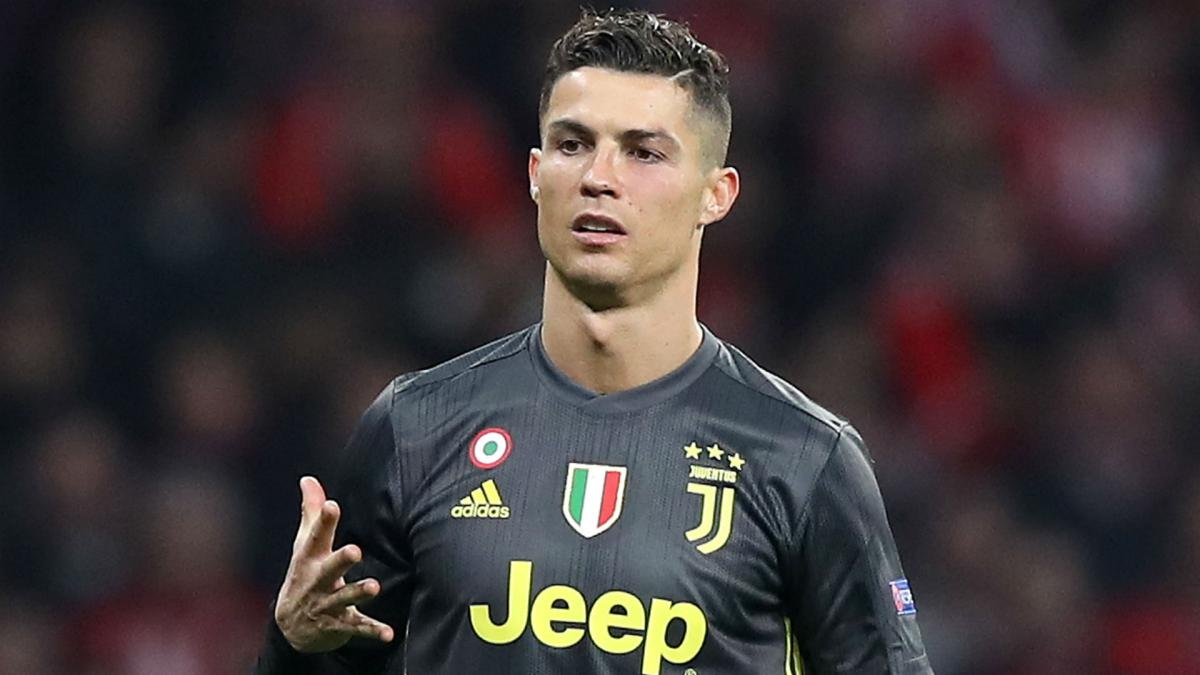

In [ ]:
img = cv2.imread("/content/foropencvclass.jpg",1)
cv2_imshow(img)

# Extrack Specific Part From Image

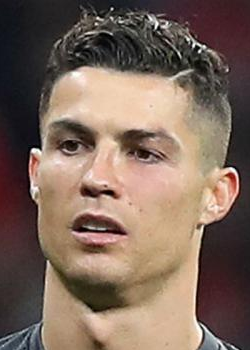

In [ ]:
#first two values up and down and second values left and right
roi = img[:350,500:750]
cv2_imshow(roi)

# Resizing the Image

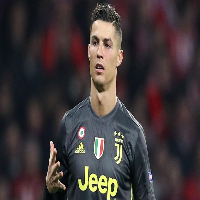

In [ ]:
resized = cv2.resize(img, (200, 200))
cv2_imshow(resized)

# Smoothing the Image


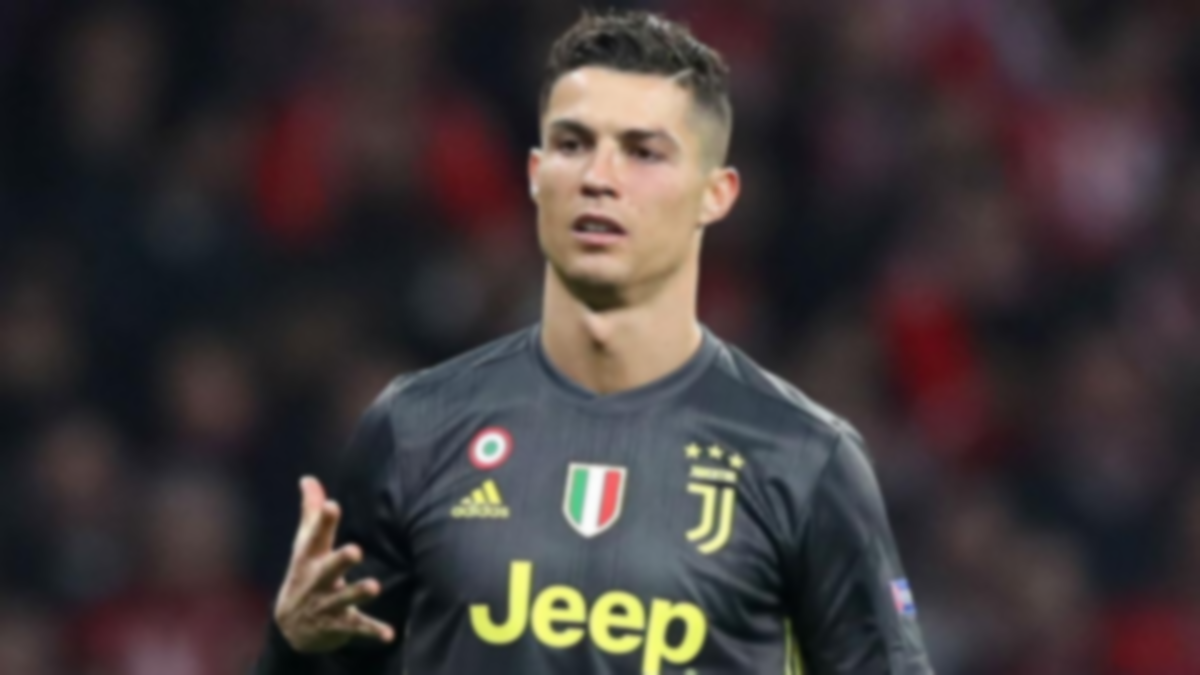

In [ ]:
blurred = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(blurred)

# Draw Something on Image

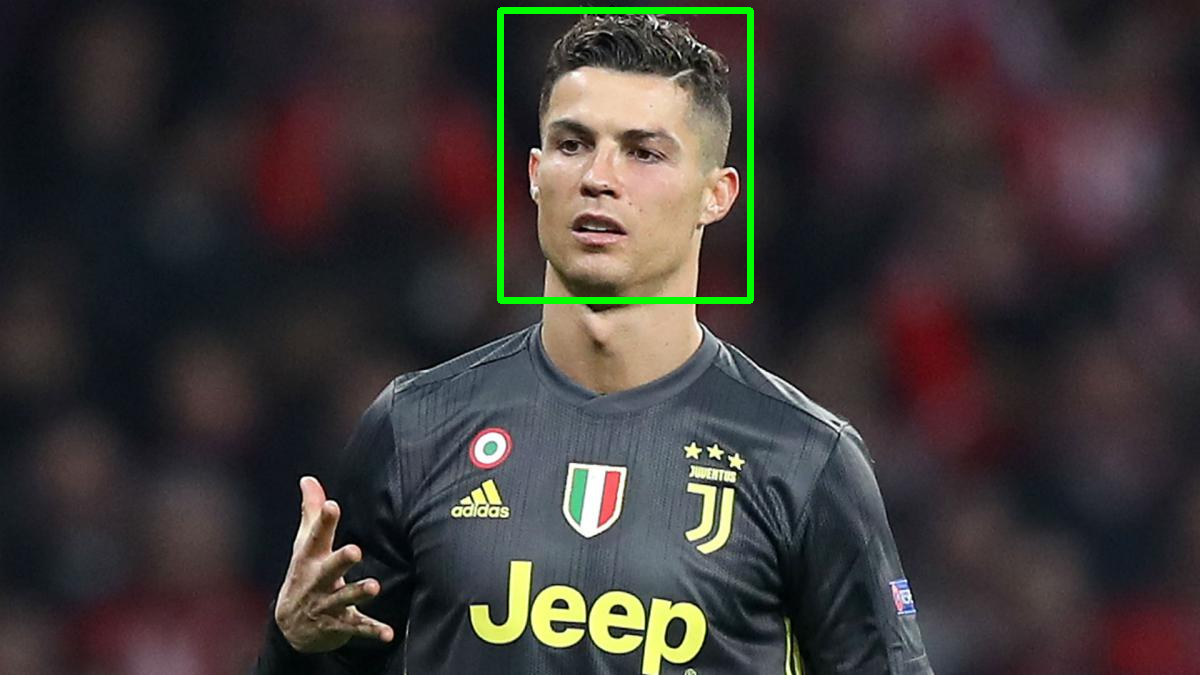

In [ ]:
output = img.copy()
#first value is represent left
#second value is represent up
#third value is represent right
#forth value is represent down
cv2.rectangle(output, (500, 10), (750, 300), (0, 255, 0), 5)
cv2_imshow(output)


# Write Some text on image

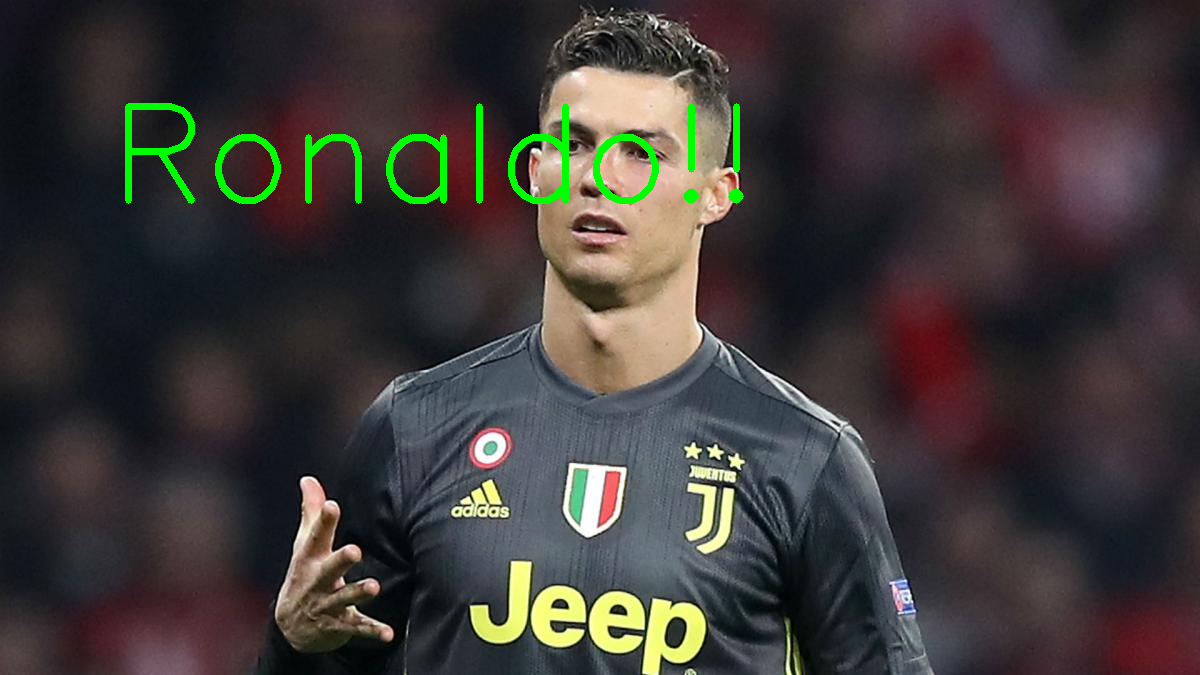

In [ ]:
output = img.copy()
cv2.putText(output, "Ronaldo!!", (110, 200), 
	cv2.FONT_HERSHEY_SIMPLEX, 4.5, (0, 255, 0), 5)
cv2_imshow(output)

# Implementation of Face detection model


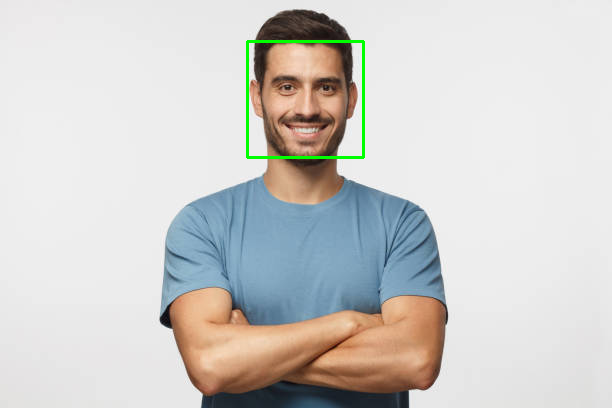

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


img2 = cv2.imread("/content/istockphoto-1045886560-612x612.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(img2)

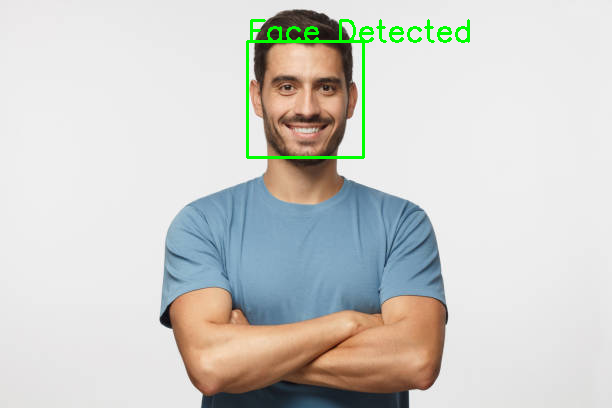

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")


img2 = cv2.imread("/content/istockphoto-1045886560-612x612.jpg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img2, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the resulting frame
cv2_imshow(img2)


# Accessing The Camera

In [ ]:
import cv2 
# Open the device at the ID 0

cap = cv2.VideoCapture(0)

while(True):

# Capture frame-by-frame

    ret, frame = cap.read()
    cv2.imshow('preview',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()

cv2.destroyAllWindows()


In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, "Face Detected", (x, y), 
	cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

# Deep Neural Network
# Emotions Detection

In [ ]:
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------


	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one

# Testing

In [ ]:
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import model_from_json
import cv2
import numpy as np

model= model_from_json(open("fer.json","r").read())
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
model.load_weights('fer2.h5')

class_labels = ['Angry','Happy','Neutral','Sad','Surprise']


cap = cv2.VideoCapture(0)



while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    # rect,face,image = face_detector(frame)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)


            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# MNIST Handwritten Digit Classification

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


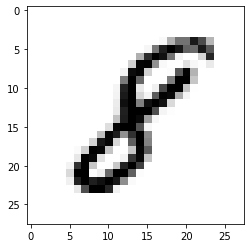

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 36s 4ms/step - loss: 0.3633 - accuracy: 0.8893
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0838 - accuracy: 0.9750
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9815
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9871


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9803


[0.06485750526189804, 0.9803000092506409]

The result of is:  5


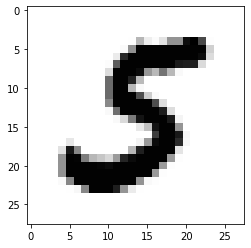

In [ ]:
image_index = 7393
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("The result of is: ",pred.argmax())